## 4.2 손실 함수
### 4.2.1 오차제곱합(sum of squares for error, SSE)

In [1]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
import numpy as np

# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(sum_squares_error(np.array(y), np.array(t)))

# 예2 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


### 4.2.2 교차 엔트로피 오차(cross entropy error, CEE)

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7    # np.log에 0을 입력하면 -inf가 되어 계산 진행 불가. 이를 방지.
    return -np.sum(t * np.log(y + delta))

In [4]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### 4.2.3 미니배치 

In [5]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_label=True, normalize=False)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [6]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [7]:
print(np.random.choice(60000, 10))

[32714  5696 49951 58873 21604 43873 15428 17018 17012 19176]


### 4.2.4 (배치용) 교차 엔트로피 오차 

In [8]:
# 정답 레이블(t)이 원-핫 인코딩일 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [9]:
# 정답 레이블이 원-핫 인코딩이 아닐 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로 그 계산을 무시하는 것.

### 4.2.5 왜 손실 함수를 설정하는가?
신경망을 학습할 때 정확도를 지표로 삼으면, 매개변수의 미분이 대부분의 장소에서 0이 되기 때문에 이를 신경망 학습의 지표로 삼으면 안된다. 정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다. 이는 '계단 함수'를 활성화 함수로 사용하지 않는 이유와도 들어맞는다. 반면 시그모이드 함수는 미분이 어느 장소라도 0이 되지 않는다.

## 4.3 수치 미분
### 4.3.1 미분 

In [10]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h)-f(x)) / h

# 1e-50은 너무 작아서 반올림오차(rounding error)를 일으킴. 10^(-4) 정도로도 충분
# 진정한 의미의 접선과 이 구현값은 엄밀히는 일치하지 않음. 한계점임.
# 따라서 이를 보완하기 위해 전방차분 대신 중심차분(중앙차분) 활용

In [11]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h)-f(x-h)) / (2*h)

### 4.3.2 수치 미분의 

In [12]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

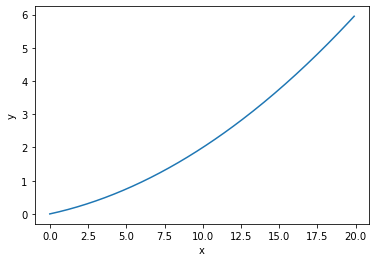

In [13]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다(20 미포함)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

In [14]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### 4.3.3 편미분

In [15]:
def function_2(x):
    return x[0]**2 + x[1]**2
# 또는 return np.sum(x**2)

In [16]:
# x_0 = 3, x_1 = 4 일 때, x_0에 대한 편미분은?

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

## 4.4 기울기

In [17]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    
    return grad

In [18]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


<b> 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향임! </b>

### 4.4.1 경사법(경사 하강법)

In [19]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

In [20]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


In [21]:
# 학습률이 너무 큰 예
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr=10.0, step_num=100))

[-2.58983747e+13 -1.29524862e+12]


In [22]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr=1e-5, step_num=100))

[-2.99400594  3.99200791]


### 4.4.2 신경망에서의 기울기 

In [23]:
import sys, os
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [24]:
net = simpleNet()
print(net.W) # 가중치 매개변수

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p)) # 최댓값의 인덱스

t = np.array([0, 0, 1]) # 정답 레이블
print(net.loss(x, t))

[[ 0.16898761 -0.11004477  1.2382047 ]
 [-0.33239157  1.88181042  1.31480292]]
[-0.19775985  1.62760251  1.92624544]
2
0.6213158513862862


In [25]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.03853659  0.23912119 -0.27765778]
 [ 0.05780488  0.35868179 -0.41648667]]


In [26]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5 학습 알고리즘 구현하기
### 4.5.1 2층 신경망 클래스 

In [27]:
import sys, os
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [28]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [29]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10) # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

KeyboardInterrupt: 

### 4.5.2 미니배치 학습 구현하기 

In [ ]:
import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판!
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    print(i, '번째 학습')